# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import csv
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../WeatherPy/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)
with open(output_data_file,'r') as file:
        reader = csv.reader(file)
        for row in reader:
            print(row)
print(type(reader))

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    # what is .city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

606

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'imperial'
query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_data = []
names =[]
lat = []
lng = []
temp = []
max_t = []
cloud = []
wspeed = []
country = []
date = []
humid = []
record_count = 0



In [4]:
for city in cities:
    response = requests.get(query_url + city).json()
    try: 
        names.append(response['name']) 
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp']) 
        max_t.append(response['main']['temp_max'])
        cloud.append(response['clouds']['all']) 
        wspeed.append(response['wind']['speed']) 
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humid.append(response['main']['humidity'])
        city_data = ({'City':names,
                     'Lat':lat,
                     'Lon':lng,
                     'Temp':temp,
                     'Max Temp':max_t, 
                     'Cloudiness':cloud,
                     'Wind Speed':wspeed,
                     'Country':country,
                     'Date':date,
                     'Humidity':humid})
        print(f'city number {record_count} {city}')
        record_count += 1
    except: 
        print('uh oh city not found!')
        


city number 0 avera
city number 1 gizo
city number 2 bredasdorp
city number 3 viedma
city number 4 busselton
city number 5 hithadhoo
city number 6 barrow
city number 7 linxia
city number 8 robinson
city number 9 kodiak
city number 10 pevek
city number 11 saskylakh
city number 12 pisco
city number 13 magadan
city number 14 mirnyy
city number 15 coihaique
city number 16 avarua
city number 17 thompson
city number 18 zhireken
city number 19 saldanha
city number 20 albany
city number 21 myshkin
uh oh city not found!
city number 22 nanortalik
city number 23 hobart
city number 24 kaitangata
uh oh city not found!
city number 25 puerto leguizamo
city number 26 forio
city number 27 touros
city number 28 punta arenas
city number 29 vaini
city number 30 pierre
city number 31 saint pete beach
city number 32 bulgan
city number 33 isangel
city number 34 khatanga
city number 35 rikitea
city number 36 qaanaaq
city number 37 maragogi
city number 38 ushuaia
city number 39 arman
city number 40 teya
city n

city number 307 mollendo
city number 308 elat
city number 309 ostersund
city number 310 severobaykalsk
city number 311 korla
city number 312 kita
city number 313 omboue
city number 314 srednekolymsk
city number 315 beatrice
city number 316 virginia beach
city number 317 phalodi
uh oh city not found!
city number 318 nyurba
city number 319 tatarsk
uh oh city not found!
city number 320 polunochnoye
city number 321 aki
city number 322 milkovo
city number 323 egvekinot
city number 324 bara
city number 325 meulaboh
city number 326 gayeri
city number 327 solnechnyy
city number 328 naze
city number 329 berlevag
uh oh city not found!
city number 330 sabang
uh oh city not found!
city number 331 victor harbor
city number 332 itarema
city number 333 santa maria da vitoria
city number 334 walvis bay
city number 335 provideniya
city number 336 fort morgan
city number 337 segezha
city number 338 sabalgarh
city number 339 abnub
city number 340 quatre cocos
uh oh city not found!
city number 341 iralaya

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
df = pd.DataFrame(city_data)
csv_file = df.to_csv('city_data.csv')
df.head()

,City,Lat,Lon,Temp,Max Temp,Cloudiness,Wind Speed,Country,Date,Humidity
0,Avera,33.1940,-82.5271,62.64,64.40,1,9.22,US,1619131767,19
1,Gizo Government Station,-8.1030,156.8419,83.21,83.21,100,3.62,SB,1619132237,71
2,Bredasdorp,-34.5322,20.0403,62.08,62.08,1,1.88,ZA,1619131697,92
3,Viedma,-40.8135,-62.9967,60.58,60.58,40,7.14,AR,1619132036,59
4,Busselton,-33.6500,115.3333,55.08,57.00,82,1.99,AU,1619131934,84


In [6]:
response

{'coord': {'lon': 128.1814, 'lat': -3.6954},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 78.8,
  'feels_like': 78.8,
  'temp_min': 78.8,
  'temp_max': 78.8,
  'pressure': 1010,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 330},
 'clouds': {'all': 40},
 'dt': 1619132292,
 'sys': {'type': 1,
  'id': 9361,
  'country': 'ID',
  'sunrise': 1619126719,
  'sunset': 1619169935},
 'timezone': 32400,
 'id': 1651531,
 'name': 'Ambon City',
 'cod': 200}

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
df.loc[df['Humidity']>=100]


,City,Lat,Lon,Temp,Max Temp,Cloudiness,Wind Speed,Country,Date,Humidity
93,Cape Town,-33.9258,18.4232,56.48,57.00,90,12.66,ZA,1619131834,100
265,Cabedelo,-6.9811,-34.8339,78.80,78.80,0,6.91,BR,1619132284,100
268,Martapura,-3.4167,114.8500,73.40,73.40,18,2.30,ID,1619132315,100
356,Ancud,-41.8697,-73.8203,47.89,51.01,75,8.05,CL,1619131970,100
423,Lithgow,-33.4833,150.1500,46.99,46.99,4,5.01,AU,1619132362,100
465,Varkaus,62.3153,27.8730,36.81,39.00,0,2.30,FI,1619132375,100
502,Aniva,46.7144,142.5294,33.80,33.80,75,4.47,RU,1619132388,100
531,Havre-St-Pierre,50.2334,-63.5986,37.40,37.40,90,19.57,CA,1619132397,100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

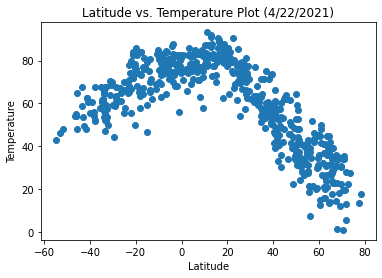

In [10]:
plt.scatter(lat,temp)
plt.title('Latitude vs. Temperature Plot (4/22/2021)')
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()

## Latitude vs. Humidity Plot

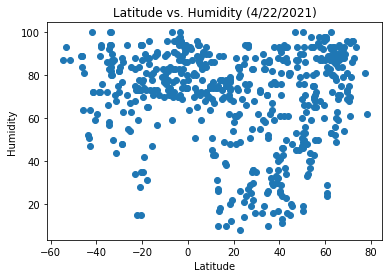

In [11]:
plt.scatter(lat,humid)
plt.title('Latitude vs. Humidity (4/22/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

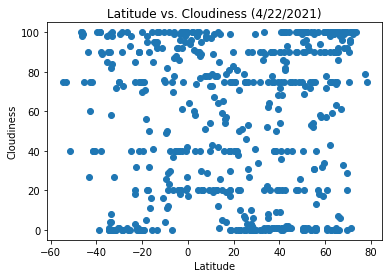

In [12]:
plt.scatter(lat,cloud)
plt.title('Latitude vs. Cloudiness (4/22/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

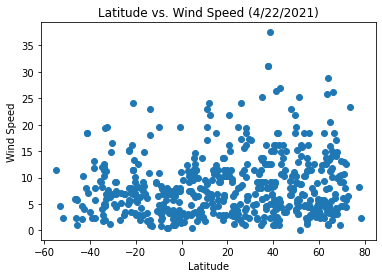

In [27]:
plt.scatter(lat,wspeed)
plt.title('Latitude vs. Wind Speed (4/22/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [21]:
response

{'coord': {'lon': 128.1814, 'lat': -3.6954},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 78.8,
  'feels_like': 78.8,
  'temp_min': 78.8,
  'temp_max': 78.8,
  'pressure': 1010,
  'humidity': 94},
 'visibility': 10000,
 'wind': {'speed': 6.91, 'deg': 330},
 'clouds': {'all': 40},
 'dt': 1619132292,
 'sys': {'type': 1,
  'id': 9361,
  'country': 'ID',
  'sunrise': 1619126719,
  'sunset': 1619169935},
 'timezone': 32400,
 'id': 1651531,
 'name': 'Ambon City',
 'cod': 200}

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

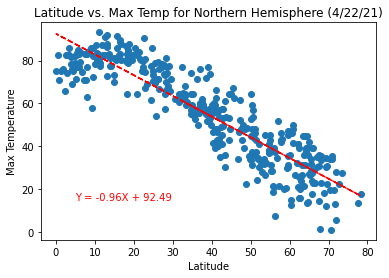

LinregressResult(slope=-0.9668658772812404, intercept=92.49432020127878, rvalue=-0.9009523541093172, pvalue=2.5935503839760275e-137, stderr=0.02411113684223455)

In [46]:
north_hemi = df.loc[df['Lat']>0]
south_hemi = df.loc[df['Lat']<0]
n_max_t = north_hemi.iloc[:,4]
n_lat = north_hemi.iloc[:,1]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(n_lat, n_max_t)
vc_fit = vc_slope * n_lat + vc_int
plt.scatter(n_lat,n_max_t)
plt.plot(n_lat,vc_fit,'--',color='red')
plt.title('Latitude vs. Max Temp for Northern Hemisphere (4/22/21)')
plt.text(5,15,'Y = -0.96X + 92.49',color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()
linregress(n_lat,n_max_t)

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

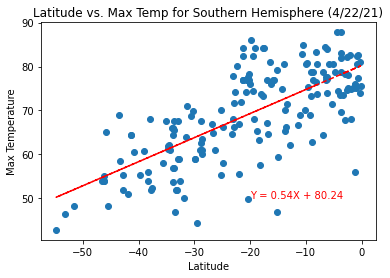

In [60]:
s_maxt = south_hemi.iloc[:,4]
s_lat = south_hemi.iloc[:,1]

linregress(s_lat,s_maxt)
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(s_lat, s_maxt)
vc_fit = vc_slope * s_lat + vc_int
plt.scatter(s_lat,s_maxt)
plt.plot(s_lat,vc_fit,'--',color='red')
plt.title('Latitude vs. Max Temp for Southern Hemisphere (4/22/21)')
plt.text(-20,50,'Y = 0.54X + 80.24',color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

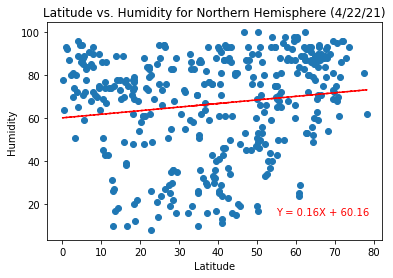

LinregressResult(slope=0.16661619822470009, intercept=60.165776729013736, rvalue=0.14327676030724376, pvalue=0.00544200861366881, stderr=0.059591321102831475)

In [70]:
n_humid = north_hemi.iloc[:,9]

vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(n_lat, n_humid)
vc_fit = vc_slope * n_lat + vc_int
plt.scatter(n_lat,n_humid)
plt.plot(n_lat,vc_fit,'--',color='red')
plt.title('Latitude vs. Humidity for Northern Hemisphere (4/22/21)')
plt.text(55,15,'Y = 0.16X + 60.16',color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
linregress(n_lat,n_humid)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

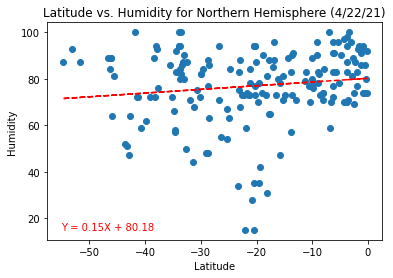

LinregressResult(slope=0.15893470624118106, intercept=80.18961650244357, rvalue=0.13637202606636795, pvalue=0.06640666497454654, stderr=0.08605593268049203)

In [74]:
s_humid = south_hemi.iloc[:,9]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(s_lat, s_humid)
vc_fit = vc_slope * s_lat + vc_int
plt.scatter(s_lat,s_humid)
plt.plot(s_lat,vc_fit,'--',color='red')
plt.title('Latitude vs. Humidity for Northern Hemisphere (4/22/21)')
plt.text(-55,15,'Y = 0.15X + 80.18',color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()
linregress(s_lat,s_humid)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

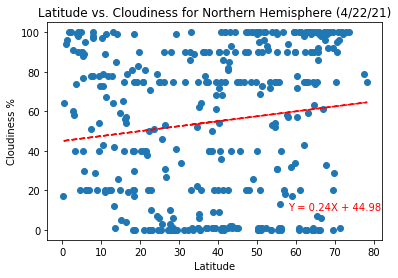

LinregressResult(slope=0.24985378522517226, intercept=44.98472929517327, rvalue=0.13578194427947632, pvalue=0.00846762891187792, stderr=0.09439492424077171)

In [86]:
n_cloud = north_hemi.iloc[:,5]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(n_lat, n_cloud)
vc_fit = vc_slope * n_lat + vc_int
plt.scatter(n_lat,n_cloud)
plt.plot(n_lat,vc_fit,'--',color='red')
plt.title('Latitude vs. Cloudiness for Northern Hemisphere (4/22/21)')
plt.text(58,10,'Y = 0.24X + 44.98',color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()
linregress(n_lat,n_cloud)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

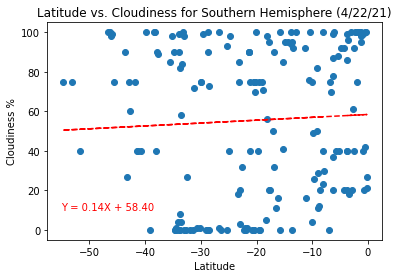

LinregressResult(slope=0.145072938467941, intercept=58.4066364038976, rvalue=0.052284313090945465, pvalue=0.48331939773565014, stderr=0.20653056415847493)

In [91]:
s_cloud = south_hemi.iloc[:,5]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(s_lat, s_cloud)
vc_fit = vc_slope * s_lat + vc_int
plt.scatter(s_lat,s_cloud)
plt.plot(s_lat,vc_fit,'--',color='red')
plt.title('Latitude vs. Cloudiness for Southern Hemisphere (4/22/21)')
plt.text(-55,10,'Y = 0.14X + 58.40',color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.show()
linregress(s_lat,s_cloud)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

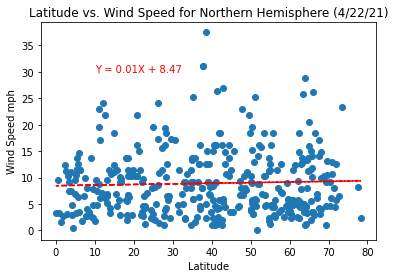

LinregressResult(slope=0.011580512674890086, intercept=8.475604213070397, rvalue=0.039231363705054506, pvalue=0.4487698448376143, stderr=0.015272336937207233)

In [98]:
n_wspeed = north_hemi.iloc[:,6]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(n_lat, n_wspeed)
vc_fit = vc_slope * n_lat + vc_int
plt.scatter(n_lat,n_wspeed)
plt.plot(n_lat,vc_fit,'--',color='red')
plt.title('Latitude vs. Wind Speed for Northern Hemisphere (4/22/21)')
plt.text(10,30,'Y = 0.01X + 8.47',color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
plt.show()
linregress(n_lat,n_wspeed)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

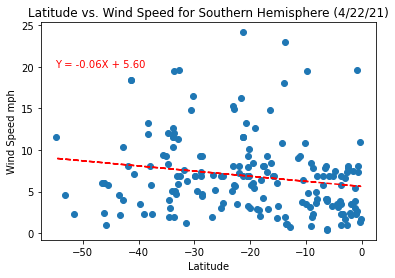

LinregressResult(slope=-0.06164582083220345, intercept=5.609667526540447, rvalue=-0.18391223744548973, pvalue=0.0129459353327585, stderr=0.024557544900912928)

In [100]:
s_wspeed = south_hemi.iloc[:,6]
vc_slope, vc_int, vc_r, vc_p, vc_std_err = linregress(s_lat, s_wspeed)
vc_fit = vc_slope * s_lat + vc_int
plt.scatter(s_lat,s_wspeed)
plt.plot(s_lat,vc_fit,'--',color='red')
plt.title('Latitude vs. Wind Speed for Southern Hemisphere (4/22/21)')
plt.text(-55,20,'Y = -0.06X + 5.60',color = 'red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed mph')
plt.show()
linregress(s_lat,s_wspeed)